# Tutorial 2 - fourier transforms & filters

## Objectives:

 - Fourier transform of images (FT)
     - display the amplitude and phase of the FT of an image
     - understand how characteristic of basic shapes influence the aspect of the FT amplitude
     - use the FT to apply filters in the frequency domain
 - apply filters in the frequency domain  
 - apply convolution filter on images

<div class="alert alert-block alert-info">
    <i class="bi-hexagon"></i>
    Parts of the code that should be written of modified are specified by
    <strong>YOUR TURN</strong> at the beginning of comments lines in code cells.
    </div>

In [1]:
# import libraries and functions
import numpy as np
from numpy.fft import fft2, fftshift, ifft2, ifftshift

import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
from matplotlib.colors import LogNorm

import os
from scipy import ndimage

from skimage.morphology import dilation, erosion
from skimage.morphology import square,rectangle

%matplotlib inline

In [2]:
def giveiminfo(image):
    '''Prints the general characteristics of an image'''
    print("Python object type:",type(image))
    print("Image size: ",image.size,image.shape,
          "\nMatrix dimension: ",image.ndim)
    print("Coding: ",image.dtype) 
    print("Minimum intensity: ",image.min(),
          "\nMaximum intensity: ", image.max(),'\n')


## Exercice 1: fourier transform

The discrete Fourier transform of an image is a complex image. Therefore it has two components and cannot be displayed like a simple image but rather two images: one amplitude or module image and one phase image.

> - We will use the `fft2` and `ifft2` functions from the numpy library to perform direct and inverse fourier transform respectively.  
The output contains the term for zero frequency in the low-order corner of the transformed axes and the term for the Nyquist frequency in the middle of the axes.  
> - We will then apply the `fftshift` and `ifftshift` function to shift the low frequency back to the center of the image.

Let's start by inspection of the Fourier transforms of simple images.

<div class="alert alert-block alert-warning">
    Change the frequency of the sine function and the dimension of the rectangle below. How does it affect the module of the fourier transform of the image?
    </div>

<function matplotlib.pyplot.show(*args, **kw)>

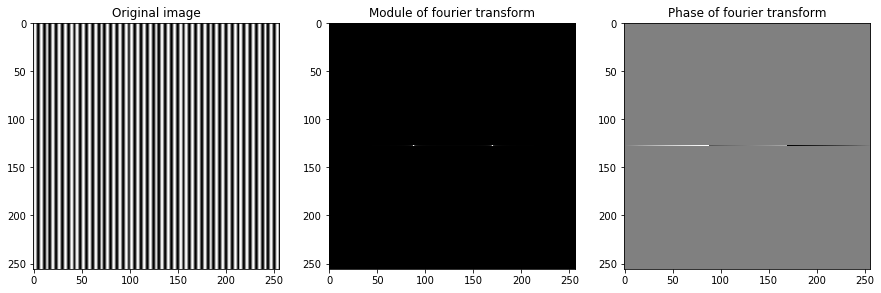

In [12]:
# YOUR TURN: change the periodicity of the sine function
sin1=np.fromfunction(lambda x, y: 255*np.sin(1*y),(256,256))
ft_sin1= fftshift(fft2(sin1)/(256^2))

f = plt.figure(figsize=(15,8))
plt.subplot(1,3,1)
plt.imshow(sin1,cmap='gray')
plt.title("Original image")
plt.subplot(1,3,2)
plt.imshow(np.abs(ft_sin1), cmap='gray')
plt.title("Module of fourier transform")
plt.subplot(1,3,3)
plt.imshow(np.angle(ft_sin1), cmap='gray')
plt.title("Phase of fourier transform")
plt.show

Text(0.5, 1.0, 'Phase of fourier transform')

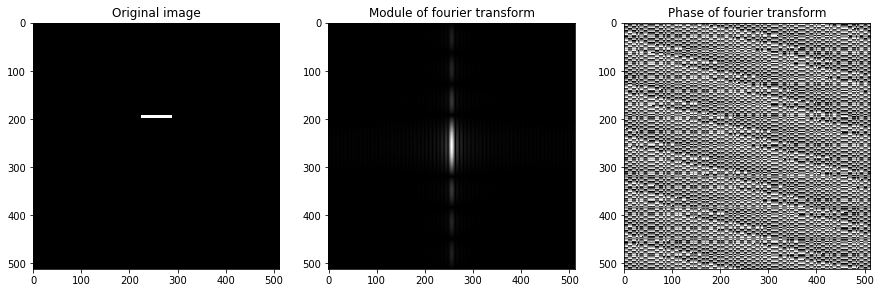

In [8]:
# Create a black square image
square = np.zeros((512,512))
# Add a white rectangle
# YOUR TURN: change the dimensions of the rectangle
square[192:200,224:288]=1
# Perform fourier transform of the image
ft_sq= fftshift(fft2(square)/(square.shape[0]*square.shape[1]))

f = plt.figure(figsize=(15,8))
plt.subplot('131')
plt.imshow(square,cmap='gray')
plt.title("Original image")
plt.subplot('132')
plt.imshow(np.abs(ft_sq), cmap='gray')
plt.title("Module of fourier transform")
plt.subplot('133')
plt.imshow(np.angle(ft_sq), cmap='gray')
plt.title("Phase of fourier transform")

## Exercice 2: quantification of a dot blot

The following  black and white image shows the result of a dot blot experiment. We want to quantify the intensity of the dots.

Three different methods will be tested and compared:
- global thresholding
- adaptative thresholding
- use of knowledge on the image

The following blocks perform image preprocessing:
>1. Conversion to a monochromatic image using the `color.rgb2gray` function from SCIKIT-IMAGE
>1. Normalization to 8 bits

At every step, the evolution of image characteristics and the histogram are displayed.

Raw image characteristics:
Python object type: <class 'numpy.ndarray'>
Image size:  433998 (282, 513, 3) 
Matrix dimension:  3
Coding:  uint8
Minimum intensity:  57 
Maximum intensity:  246 

Image characteristics after rgb2gray:
Python object type: <class 'numpy.ndarray'>
Image size:  144666 (282, 513) 
Matrix dimension:  2
Coding:  float64
Minimum intensity:  0.22352941176470587 
Maximum intensity:  0.9647058823529412 



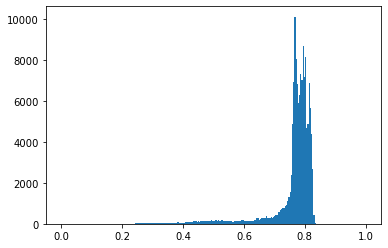

In [7]:
# Read the image
blot = imread('Dot_Blot.jpg')

# Check its characteristic
print('Raw image characteristics:')
giveiminfo(blot)

# Convert it to a grey image
from skimage import color
blotBW = color.rgb2gray(blot)

# Check its characteristic
print('Image characteristics after rgb2gray:')
giveiminfo(blotBW)

# Plot the histogram of the black and white image
f = plt.hist(blotBW.ravel(),bins=256, range=(0,1))

After conversion to a monochromatic image using the `color.rgb2gray` function, the data are floats comprised between 0 and 1 and no longer 8 bits integers.  
The following cell normalises data to 8 bits integers using the `img_as_ubyte` function from the `skimage` library. 

Python object type: <class 'numpy.ndarray'>
Image size:  144666 (282, 513) 
Matrix dimension:  2
Coding:  uint8
Minimum intensity:  57 
Maximum intensity:  246 



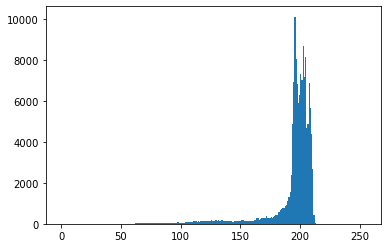

In [8]:
# Normalises the data of the monochromatic image to 8 bits integers
from skimage import img_as_ubyte
blotBW8b = img_as_ubyte(blotBW)
plt.hist(blotBW8b.ravel(),bins=256, range=(0,255))

giveiminfo(blotBW8b)

You can notice that the white background of the image has higher intensity than the dots. Since we want to quantify intensity of the dots, we will start by inverting the contrast of the image.

#### 1. Histogram inversion

<div class="alert alert-block alert-warning">
    Create a new image `blot_inv` with inverted contrast and display it.
    </div>

Python object type: <class 'numpy.ndarray'>
Image size:  144666 (282, 513) 
Matrix dimension:  2
Coding:  uint8
Minimum intensity:  9 
Maximum intensity:  198 



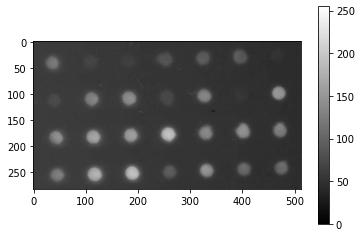

In [9]:
# YOUR TURN: 1 line to complete
blot_inv = 
#YOUR TURN: try other colormaps: 'gray', 'binary', 'Spectral'
plt.imshow(blot_inv, cmap='gray', vmin=0, vmax=255) 
plt.colorbar()

giveiminfo(blot_inv)

#### 2. Global thresholding

<div class="alert alert-block alert-warning">
    <p>Use global thresholding to segment the image to separate the dots from the background.</p>
    <i>Clue: a matrix of booleans can be displayed as a binary image.</i>
    <p>Is the segmentation satisfying? Number of dots detected, size ...</p>
    </div>

bool


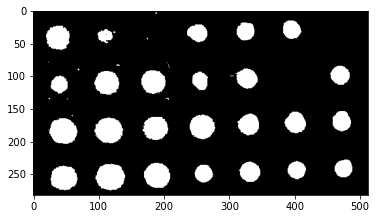

In [10]:
#global thresholding
bg =   # YOUR TURN: complete with the background value use in thresholding
# YOUR TURN: one line to complete
GT = 
print(GT.dtype)
plt.imshow(GT, cmap='gray')

#### 4. Adaptative thresholding

Now let's inspect the background of the image, was it its average value, is it even?

<div class="alert alert-block alert-warning">
    Measure the average background intensity on squares or rectangles taken of the left and on the right of the image.
    </div>

Average left noise = 59.896
Average left noise = 44.85


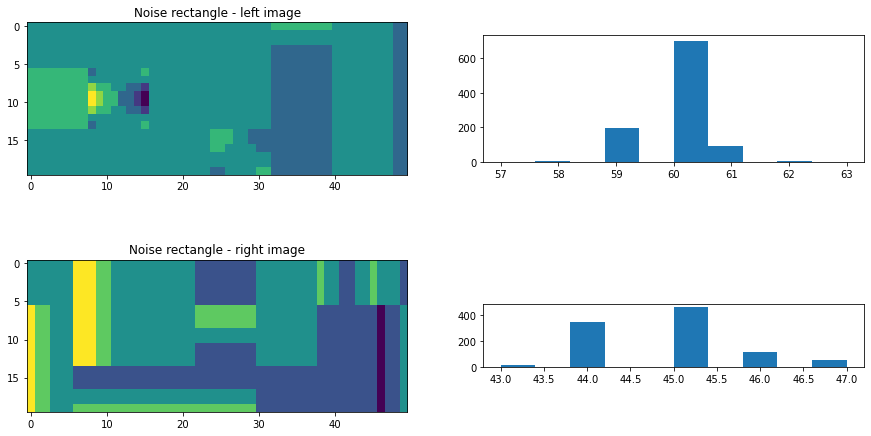

In [13]:
f=plt.figure(figsize=(15,8))
left_rec = blot_inv[210:230,0:50]
right_rec = blot_inv[50:70,450:500]
plt.subplot(2,2,1)
plt.imshow(left_rec)
plt.title('Noise rectangle - left image')
ax2 = plt.subplot(2,2,2)
plt.hist(left_rec.ravel())
ax2.set_aspect(aspect=0.003)
left_noise = np.average(left_rec)
print('Average left noise =',left_noise)
plt.subplot(2,2,3)
plt.imshow(right_rec)
plt.title('Noise rectangle - right image')
ax4 = plt.subplot(2,2,4)
plt.hist(right_rec.ravel())
ax4.set_aspect(aspect=0.0015)
right_noise = np.average(right_rec)
print('Average left noise =', right_noise)

We will try to correct for the background using adaptative thresholding that will take into account variations in the background using the following procedure

>1. A "background" image is created using a strong mean filter.  
>2. That "background" image is used to set a pixel per pixel threshold.

<div class="alert alert-block alert-warning">
    Complete the following block code to perform adaptative thresholding of the dot blot image.
    </div>

(-0.5, 512.5, 281.5, -0.5)

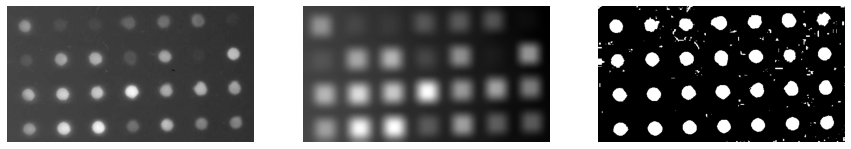

In [15]:
# YOUR TURN: create the kernel for mean filtering
mean_kernel = np.ones((40,40))*1/40**2
# calculate the convolution of the original image by the mean kernel
# to create a "background image"
filt_blot=ndimage.convolve(blot_inv.astype('float64'),
                           mean_kernel, mode='reflect')
# use the "background image" for thresholding
# YOUR TURN: 1 LINE TO COMPLETE
adapt_th = 

f = plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
plt.imshow(blot_inv, cmap='gray')
plt.axis('off')
plt.subplot(1,3,2)
plt.imshow(filt_blot, cmap='gray')
plt.axis('off')
plt.subplot(1,3,3)
plt.imshow(adapt_th, cmap='gray')
plt.axis('off')

#### 4. Morphological transformations

We will use the dilation and erosion functions from the `skimage.morphology` library to remove unwanted areas from the binary image (small white or black dots).

```python
dilation(image, footprint=None, out=None,
            shift_x=False, shift_y=False)

erosion(image, footprint=None, 
            out=None, shift_x=False, shift_y=False)
```

>**Parameters**
>- image: 
>    - ndarray
>    - Image array.
>- footprint:
>    - ndarray, optional
>    - The neighborhood or structuring element expressed as an array of 1’s and 0’s. If None, use cross-shaped footprint (connectivity=1).
>- out: 
>    - ndarray, optional
>    - The array to store the result of the morphology. If None is passed, a new array will be allocated.
>- shift_x, shift_y: 
>    - bool, optional
>    - Shift footprint about center point. This only affects 2D eccentric footprints (i.e., footprints with even-numbered sides).
>
>**Returns**
>- dilated:
>    - uint8 array, same shape and type as image
>    - The result of the morphological dilation or erosion.

<div class="alert alert-block alert-warning">
    Perform image erosion using a square or cross structuring element. Observe the influence of the structuring element size and shape
    </div>

Text(0.5, 1.0, 'image eroded with cross')

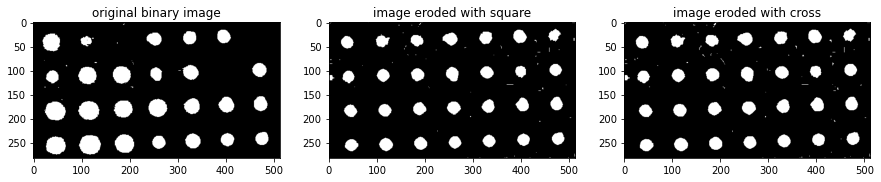

In [16]:
# Perform image erosion, using a square structuring element
# YOUR TURN: complete to create the cross structuring element
cross=np.array([[0,1,0],
                [1,1,1],
                [0,1,0]])
# YOUR TURN: change the size of the square structuring element
blot_erodedSQ3 = erosion(adapt_th,square(3)) # structuring element = square of side 3
blot_erodedSQ5 = erosion(adapt_th,square(5)) # structuring element = square of side 5
blot_erodedCR = erosion(adapt_th,cross) # structuring element = vertical cross of side 3

f = plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
plt.imshow(GT, cmap='gray')
plt.title('original binary image')
plt.subplot(1,3,2)
plt.imshow(blot_erodedSQ3, cmap='gray')
plt.title('image eroded with square')
plt.subplot(1,3,3)
plt.imshow(blot_erodedCR, cmap='gray')
plt.title('image eroded with cross')

<div class="alert alert-block alert-warning">
    Perform image dilation using a square or cross structuring element. Observe the influence of the structuring element size and shape
    </div>

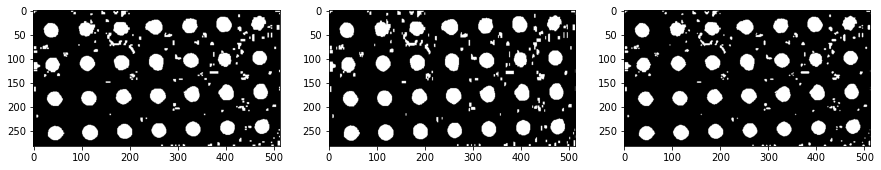

In [18]:
# TO COMPLETE
blot_dilSQ = dilation(adapt_th,square(3))
blot_dilREC = dilation(adapt_th,rectangle(5,2))
cross=np.array([[0,1,0],
                [1,1,1],
                [0,1,0]])
blot_dilCR = dilation(adapt_th,cross)

f = plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
plt.imshow(blot_dilSQ, cmap='gray')
plt.subplot(1,3,2)
plt.imshow(blot_dilREC, cmap='gray')
plt.subplot(1,3,3)
plt.imshow(blot_dilCR, cmap='gray')


<div class="alert alert-block alert-warning">
    Now combine dilation and erosion to remove small white and black dots from the original image. Compare the results obtained using a square or cross structuring element of size 3.
    </div>

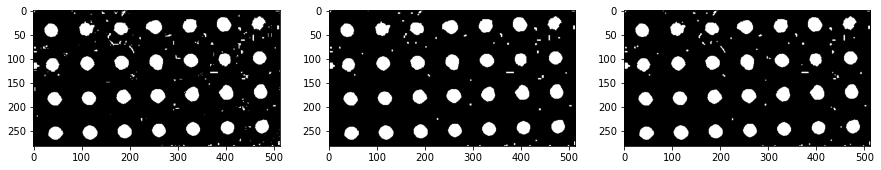

In [20]:
blot_opened = dilation(erosion(adapt_th,square(3)),square(3))
blot_openedCR = dilation(erosion(adapt_th,cross),cross)


f = plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
plt.imshow(adapt_th, cmap='gray')
plt.subplot(1,3,2)
plt.imshow(blot_opened, cmap='gray')
plt.subplot(1,3,3)
plt.imshow(blot_openedCR, cmap='gray')


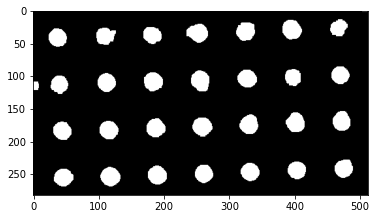

In [21]:
# remove unwanted areas using opening and closing
adapt_th_cl = dilation(erosion(adapt_th,square(5)),square(5))

plt.imshow(adapt_th_cl, cmap='gray')


## Exercice 3: Filtering in Fourier space

The image below is a negative stain micrograph of the human p97 protein imaged by electron microscopy.

We will observe how filtering in the Fourier space to remove either high or low frequencies affects the image.

Python object type: <class 'numpy.ndarray'>
Image size:  262144 (512, 512) 
Matrix dimension:  2
Coding:  uint8
Minimum intensity:  0 
Maximum intensity:  255 



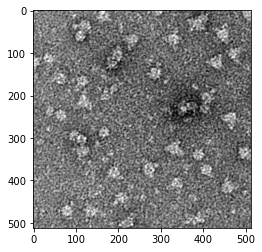

In [3]:
mic = imread('p97.jpg')
mic = mic[:512,:512]

giveiminfo(mic)

plt.imshow(mic, cmap='gray')

Text(0.5, 1.0, 'Fourier transform phase')

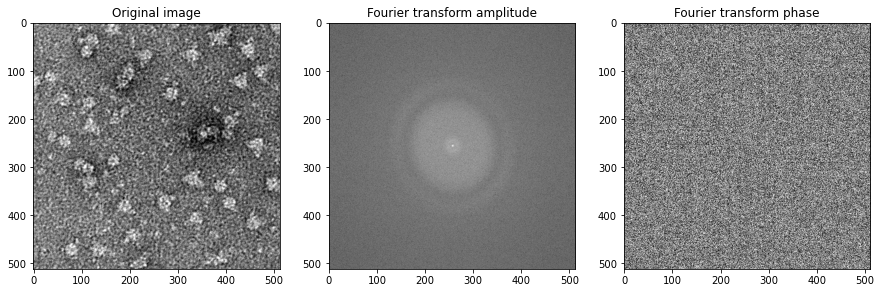

In [22]:
# make 2D DFT of the image
ft_mic=fftshift(fft2(mic)) 

f = plt.figure(figsize=(15,8))
plt.subplot(1,3,1)
plt.imshow(mic,cmap='gray')
plt.title('Original image')
plt.subplot(1,3,2)
plt.imshow(np.abs(ft_mic), norm=LogNorm(), cmap='gray')
plt.title('Fourier transform amplitude')
plt.subplot(1,3,3)
plt.imshow(np.angle(ft_mic),cmap='gray')
plt.title('Fourier transform phase')


The code creates images to filters low frequencies of the image.

Two filters are created:
- one binary image with hard edges
- one with soft edges after convolution with a gaussian kernel

Text(0.5, 1.0, 'Soft edges low pass filter')

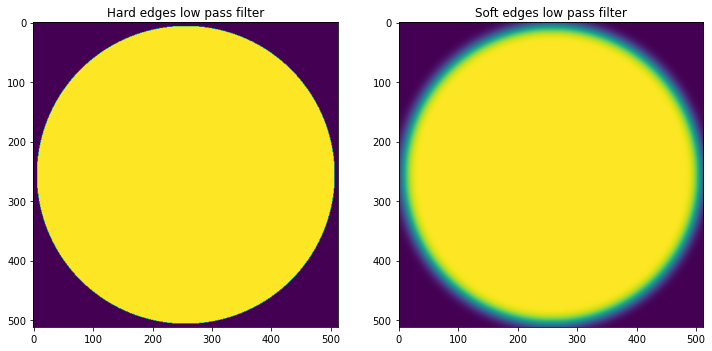

In [25]:
# create image for filtering
from skimage.draw import ellipse
from skimage.filters import gaussian

# create a low pass filter with sharp edges
# YOUR TURN: change the size of the low pass filter
LPfil = np.zeros(ft_mic.shape)
rr, cc = ellipse(ft_mic.shape[0]/2,round(ft_mic.shape[1]/2),250,250)
LPfil[rr, cc] = 1

# create a low pass filter with soft edges
LPfil_gauss=gaussian(LPfil,sigma=10)

# plot the filters
f = plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(LPfil)
plt.title('Hard edges low pass filter')
plt.subplot(1,2,2)
plt.imshow(LPfil_gauss)
plt.title('Soft edges low pass filter')


The code below applies filters to the fourier transform of the micrographs.

The filtered images are obtained after reverse fourier transform.

<div class="alert alert-block alert-warning">
    <p>Observe the effects on the filtered image when more high frequencies are removed.</p>
    What is the difference between the hard and sorf edge filters?
    </div>

Text(0.5, 1.0, 'Filtered image')

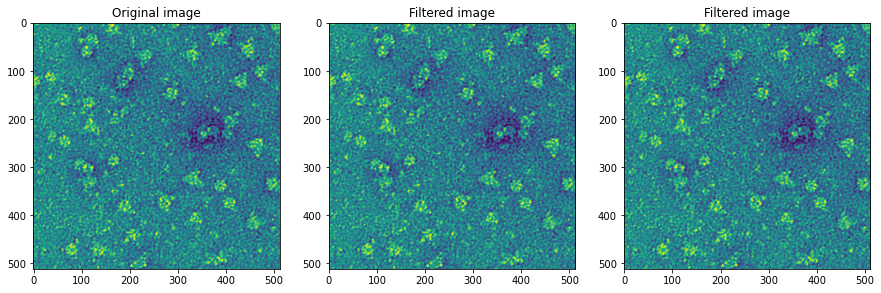

In [24]:
# apply masks to the fourier transform of the image
ft_mic_fil = np.multiply(ft_mic,LPfil)
ft_mic_fil_g = np.multiply(ft_mic,LPfil_gauss)

# apply reverse fourier transform to the filtered images
filmic = ifft2(ifftshift(ft_mic_fil))
filmic = np.abs(filmic).clip(0,255).astype(np.uint8)

filmic_g = ifft2(ifftshift(ft_mic_fil_g))
filmic_g = np.abs(filmic_g).clip(0,255).astype(np.uint8)

f = plt.figure(figsize=(15,8))
plt.subplot(1,3,1)
plt.imshow(mic, vmin=0, vmax=255)
plt.title('Original image')
plt.subplot(1,3,2)
plt.imshow(filmic, vmin=0, vmax=255)
plt.title('Filtered image')
plt.subplot(1,3,3)
plt.imshow(filmic_g, vmin=0, vmax=255)
plt.title('Filtered image')


<div class="alert alert-block alert-warning">
    Adapt the code for filtering of low frequencies
    </div>